### To check:
- Data balancing
- Correlations
- Outliers
- Distrubtion
---
### To visualize:
- Histograms -> to show distribution of each feature.
- Box plots -> to show the distribution of each feature with respect to the target.
- Scatter plots -> to show the relationships between two features.
- Heatmap of the correlation -> to show the correlation between the features and the target.
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Mobile_price_prediction/data/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Mobile_price_prediction/data/test.csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

***From info of both of train and test data:***
- They have 20 features and one target variable which is `price_range`.
- The train data has 2000 rows, and the test data has 1000 rows.
- All the features are numerical, most of then are of type int64 and only 2 of them are of type float64.
- There are no missing values in both the train and test data.

# **1. Data Exploration and visualization**

In [ ]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# check duplications
train_data.duplicated().sum()

0

## 1.1 descriptive statistics:

In [ ]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


***Based on the train_data description:***
- There is a wide range of battery power values in the data.
- 49.5% of phones have enabled bluetooth.
- The dual_sim is a binary feature, where 50.95% of the phones have dual sim support.
- 52.15% of the phones have 4G support, and 76.15% of them have 3G support.
- 50.3% have touc screen support.
- the wifi is also a binary feature, where 50.7% of the phones have wifi support.
- The mean value of the target variable is 1.5. this indicates that the data is balanced.

## 1.2 Data balancing:

In [ ]:
# re-Check the data balancing
target_distribution = train_data['price_range'].value_counts(normalize = True)
print("target_distribution: ", target_distribution)

target_distribution:  1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64


## 1.3 Correlation:

In [ ]:
correlations = train_data.corr()['price_range'].drop('price_range')
print("Correlation coefficients:\n", correlations)

Correlation coefficients:
 battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
Name: price_range, dtype: float64


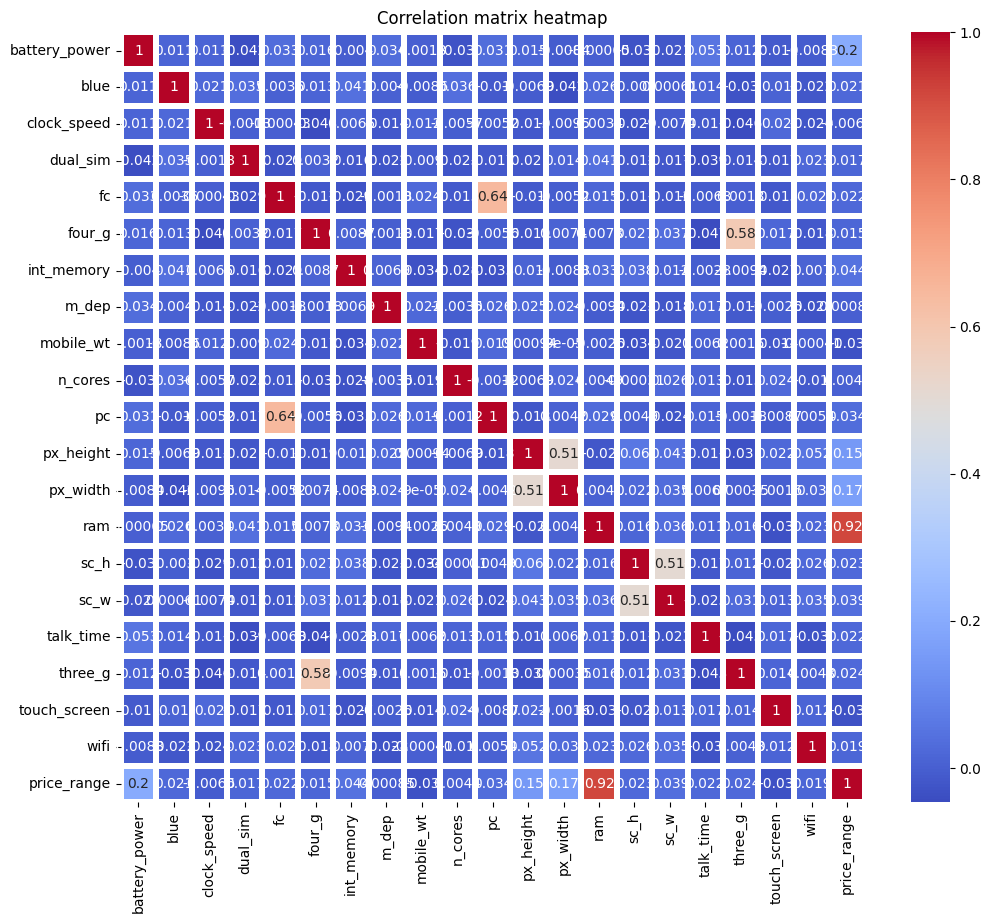

In [ ]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=3)
plt.title("Correlation matrix heatmap")
plt.show()

***Based on the correlation coefficients:***
- The `ram` feature has the strongest positive correlation with the target variable, which means that the higher ram of the phones, the higher price.
- The `battery_power`, `px_height`, and `px_width` features also have relatively high positive correlation coefficients.
- The `clock_speed`, `dual_sim`, `four_g`, `m_dep`, `n_cores`, `sc_h`, `sc_w`, `talk_time`, `three_g`, `touch_screen`, and `wifi` features have low correlation coefficients thish indicates that they have very week correlation with the target.
- The `mobile_wt` has a negative correlation coefficient to the targer, indicating that the heavier phones, the lower price.

## 1.4 check multicollinearity:
VIF(Variance inflation factor) -> detect the pairwiae multicollinearity between independent variabels

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x = train_data.drop('price_range', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                  for i in range(len(x.columns))]

In [ ]:
print(vif_data)

          feature       VIF
0   battery_power  3.625602
1     clock_speed  2.459160
2              fc  5.100151
3      int_memory  3.517207
4           m_dep  2.841891
5       mobile_wt  3.630469
6         n_cores  3.183983
7              pc  6.392139
8       px_height  8.952278
9        px_width  5.102841
10            ram  3.785238
11           sc_h  5.152254
12           sc_w  5.226959
13      talk_time  3.509266
14           blue  1.969612
15       dual_sim  1.978618
16         four_g  3.194937
17        three_g  6.036569
18   touch_screen  1.973069
19           wifi  2.016033


***Based on the VIF Values:***

There are 3 features may have a  multicollinearity with High values of VIF:

- `mobile_wt`: 12.972548
- `px_width`: 11.755282
- `sc_h`: 11.510780

## 1.5 Check the distribution:

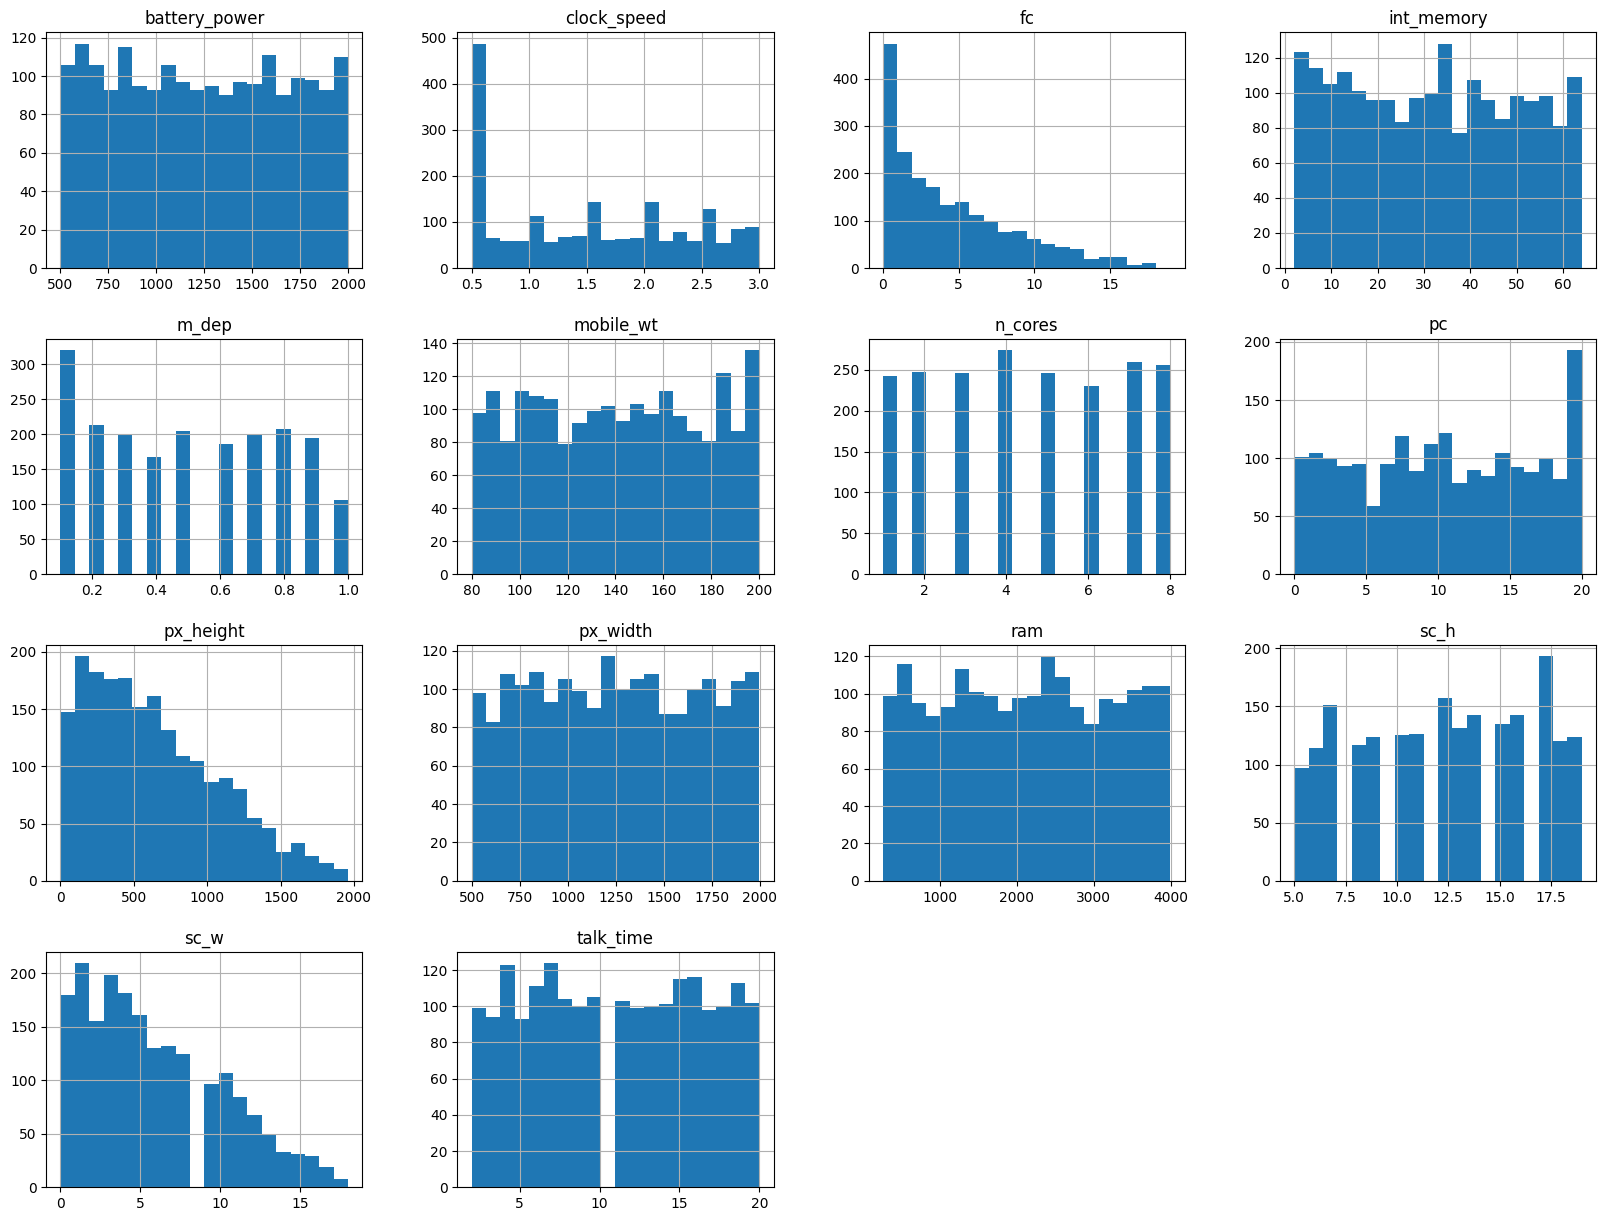

In [ ]:
numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                      'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
                      'sc_h', 'sc_w', 'talk_time']
train_data[numerical_features].hist(bins=20, figsize=(20, 15))
plt.show()

In [ ]:
# check the skewness in numbers
skewness = train_data[numerical_features].skew()
skewness

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
dtype: float64

From both the histograms and values of skewness:
- `battery_life`, `clock_speed`, `int_memory`, `m_dep`, `mobile_wt`, `n_cores`, `pc`, `px_width`, `ram`, `talk_time` are approximately symmetric; as their skewness values are close to 0.
- `fc`, `px_height`, `sc_w` are positively skewed.
- `sc_h` is moderately negatively skewed.

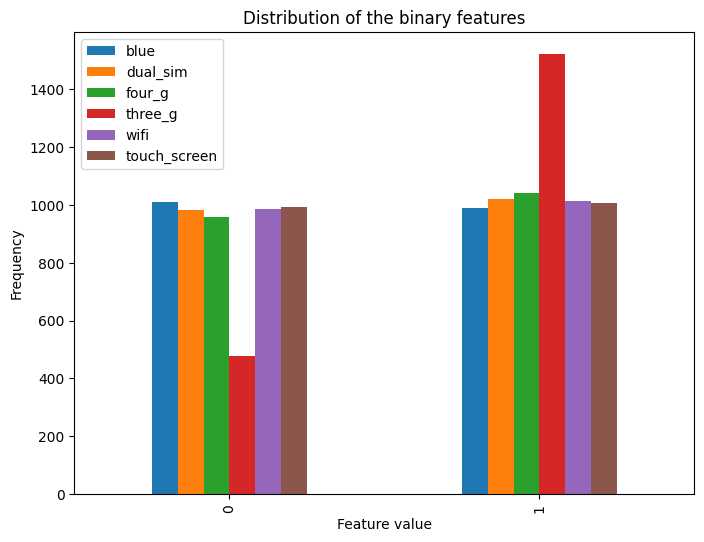

In [ ]:
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen']
# value_counts returns a pandas series; conversion is to apply the function to each column
binary_freq = train_data[binary_features].apply(pd.Series.value_counts)
binary_freq.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of the binary features')
plt.xlabel('Feature value')
plt.ylabel('Frequency')
plt.show()

From the histograms representation, there are some features skewed.

# **2. Doing some EDA to understant the relations between different features:**

***1. Internal memory vs. price range:***

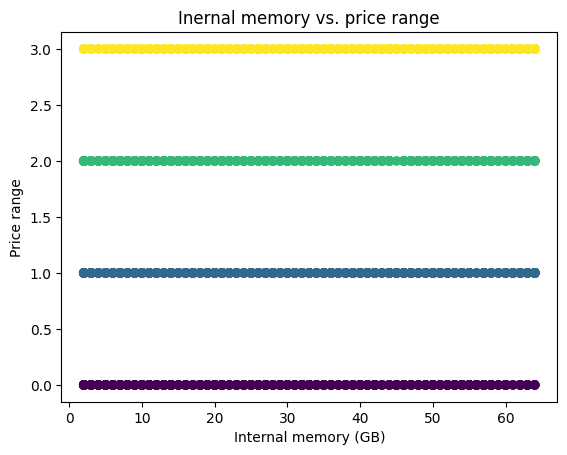

In [ ]:
x = train_data['int_memory']
y = train_data['price_range']
plt.scatter(x, y, c=y, cmap='viridis')
plt.xlabel('Internal memory (GB)')
plt.ylabel('Price range')
plt.title('Inernal memory vs. price range')
plt.show()

**Insights:**

- As the internal memory of the mobile increases, the price range tends to increase as well, as this makes sense.
- However, the overlapping of price ranges for the same internal memory space suggests that internal memory alone is not a good predictor of proce range

***2. Phones with 3G support percentage:***

In [ ]:
three_g_phones = len(train_data[train_data['three_g'] == 1])

In [ ]:
not_three_g_phones = len(train_data[train_data['three_g'] == 0])

In [ ]:
percent_3g_phones = three_g_phones / len(train_data) * 100
percent_non_3g_phones = not_three_g_phones / len(train_data) * 100

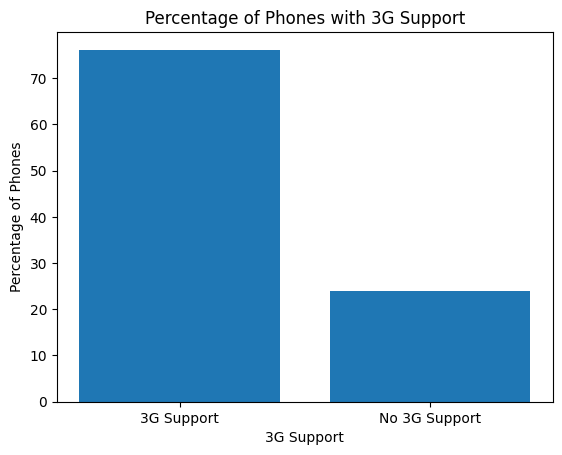

In [ ]:
plt.bar(['3G Support', 'No 3G Support'], [percent_3g_phones, percent_non_3g_phones])
plt.xlabel('3G Support')
plt.ylabel('Percentage of Phones')
plt.title('Percentage of Phones with 3G Support')
plt.show()

**Insights:**

- The majority of phones with 3G support is clear with approximately 75% of phones.
- `three_g` feature may be an improtant feature in predicting the price range of the phones.

***3. Phones with 4G support percentage***

In [ ]:
num_4g_phones = len(train_data[train_data['four_g'] == 1])

In [ ]:
num_non_4g_phones = len(train_data[train_data['four_g'] == 0])

In [ ]:
percent_4g_phones = num_4g_phones / len(train_data) * 100

In [ ]:
percent_non_4g_phones = num_non_4g_phones / len(train_data) * 100

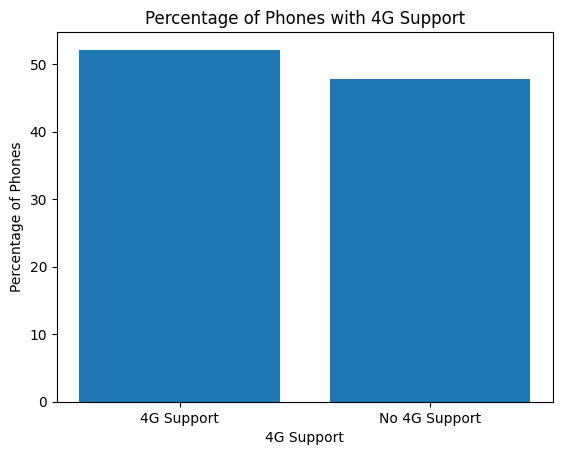

In [ ]:
plt.bar(['4G Support', 'No 4G Support'], [percent_4g_phones, percent_non_4g_phones])
plt.xlabel('4G Support')
plt.ylabel('Percentage of Phones')
plt.title('Percentage of Phones with 4G Support')
plt.show()

**Inshights:**

The higher percentage of 4G support indicates that the 4G technology is widely used.

***4. Battery power vs Price Range:***

In [ ]:
battery_power = train_data['battery_power']
price_range = train_data['price_range']

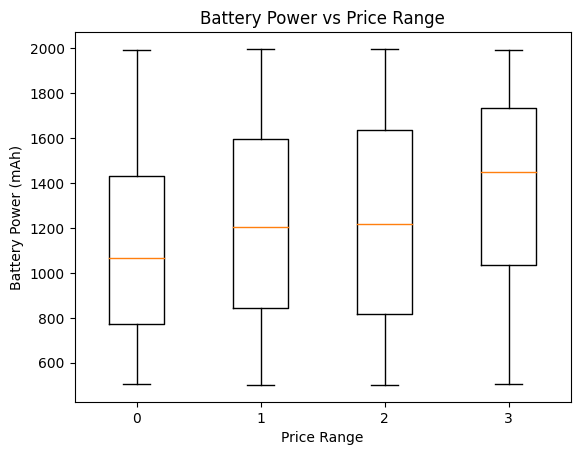

In [ ]:
plt.boxplot([battery_power[price_range == 0], battery_power[price_range == 1],
             battery_power[price_range == 2], battery_power[price_range == 3]])
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')
plt.title('Battery Power vs Price Range')
plt.xticks([1, 2, 3, 4], ['0', '1', '2', '3'])
plt.show()

**Inshights:**

- As the median battery power increases, the price range increases. This suggests that the `battery_power` is an important feature.
- The variability in battery power among the lower price ranges (0&1) and the higher price ranges (2&3) may be due to the other features effect.

***5. No of Phones vs Camera megapixels of front and primary camera:***

In [ ]:
front_camera_mp = train_data['fc']

In [ ]:
primary_camera_mp = train_data['pc']

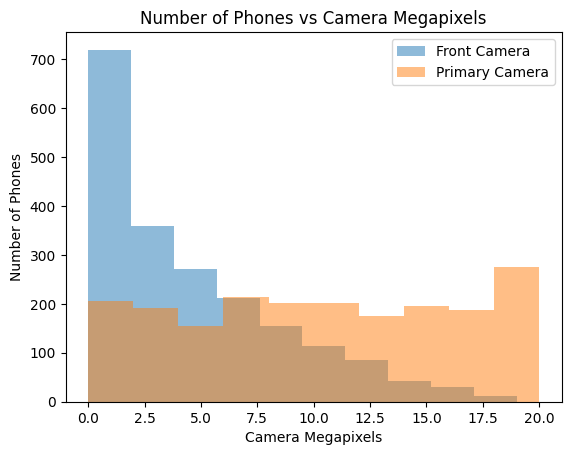

In [ ]:
plt.hist(front_camera_mp, alpha=0.5, label='Front Camera')
plt.hist(primary_camera_mp, alpha=0.5, label='Primary Camera')
plt.xlabel('Camera Megapixels')
plt.ylabel('Number of Phones')
plt.title('Number of Phones vs Camera Megapixels')
plt.legend()
plt.show()

**Inshights:**

- The front camera megapixels are generally lower than the primary camera megapixels, this makes sense.
- The front camera distibution is more skewed towards thelower end of the range, indicating that many phones have lower quality front cameras.
- The primary camera distribution is moreevenly distributed across the range, indicating that there is a wider variety of primary camera qualities among phones on the dataset, suggesting that the `pc` feature may be more important than `fc` feature.

***6. Talk time vs Price range:***

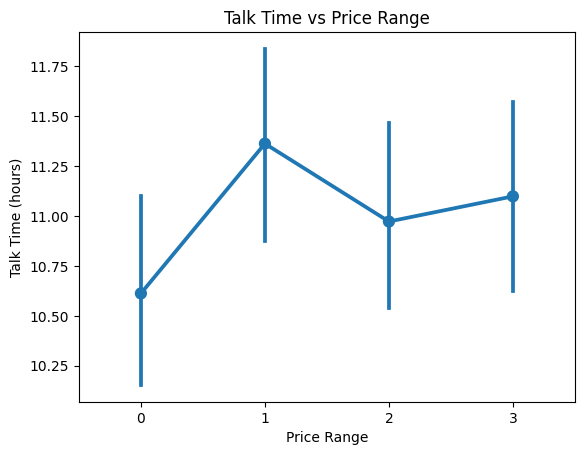

In [ ]:
sns.pointplot(y="talk_time", x="price_range", data=train_data)
plt.xlabel('Price Range')
plt.ylabel('Talk Time (hours)')
plt.title('Talk Time vs Price Range')
plt.show()

**Inshights:**

The mean talk time values for each price range class is clear, but the confidence intervals are quite wide, indicating that there is a lot of variablility in the dataset.

## Outliers detection and deletion
using IQR method

In [ ]:
from collections import Counter
def detect_outliers(df, features):
  outliers_indicies = []

  for c in features:
    Q1 = np.percentile(df[c], 25)  # 1st quartile
    Q3 = np.percentile(df[c], 75)  # 3rd quartile
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    outlier_list_col = df[(df[c] < Q1 - outlier_step) |
                          (df[c] > Q3 + outlier_step)].index  # detect quartiles indicies
    outliers_indicies.extend(outlier_list_col)

  outlier_indicies = Counter(outliers_indicies)
  multiple_outliers = list(i for i, v in outlier_indicies.items() if v > 1)

  return multiple_outliers

In [ ]:
features = train_data.columns
outliers_detected = detect_outliers(train_data, features)
train_data.loc[outliers_detected]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
229,1689,0,1.8,0,17,0,24,0.3,127,3,...,954,1200,2766,7,2,7,0,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,...,1698,1771,3720,15,7,4,0,1,0,3
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1


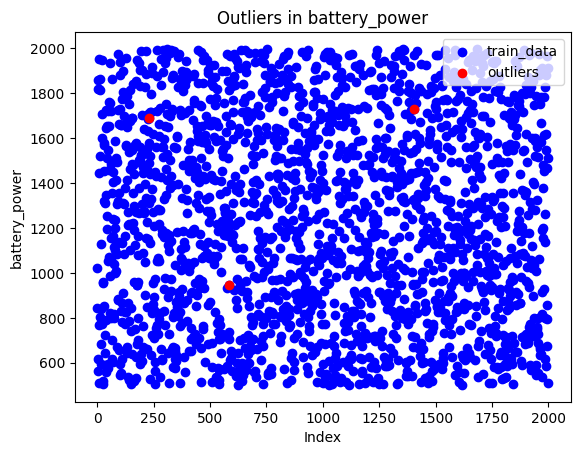

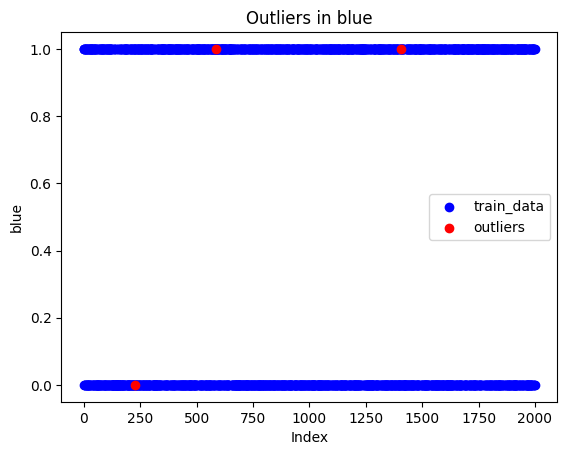

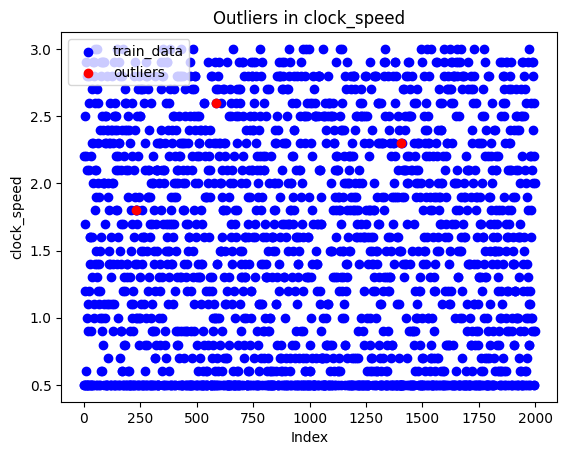

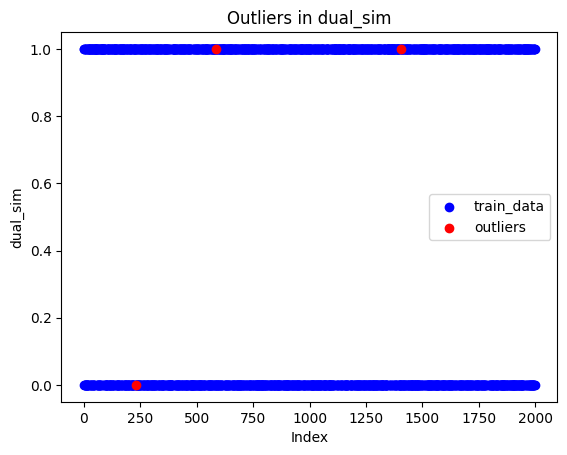

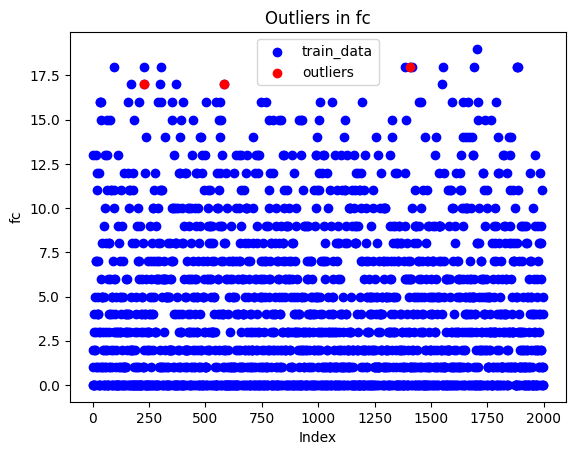

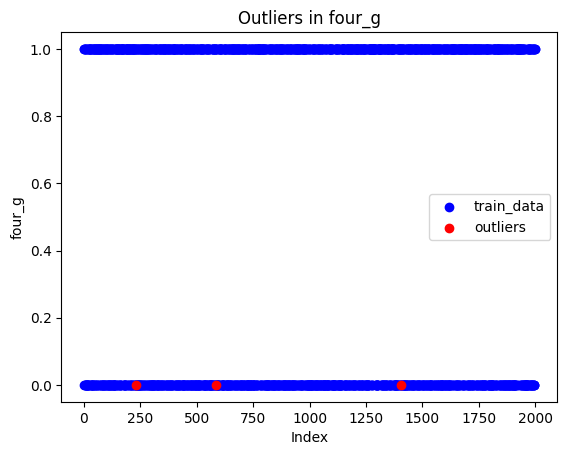

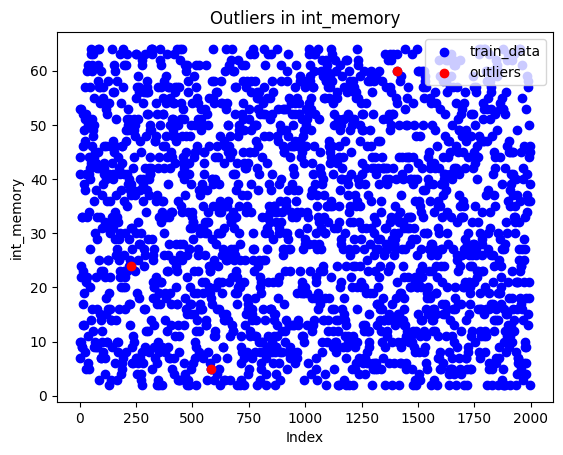

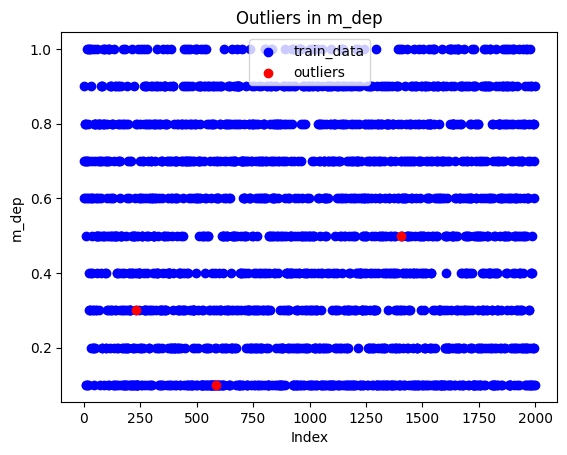

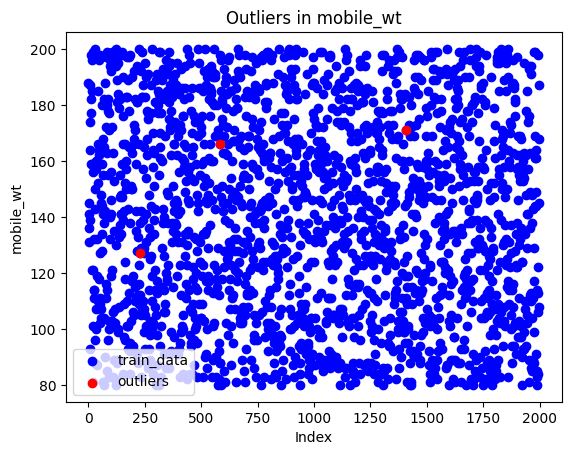

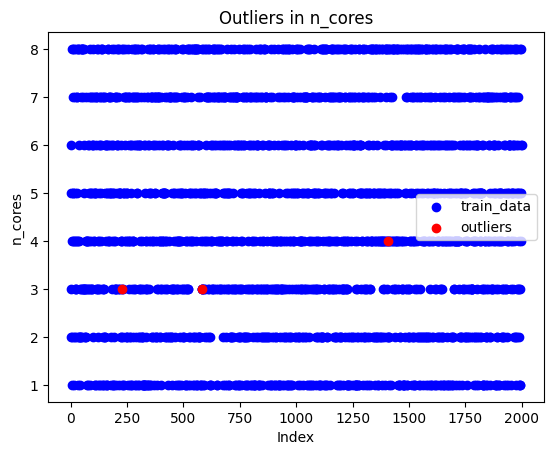

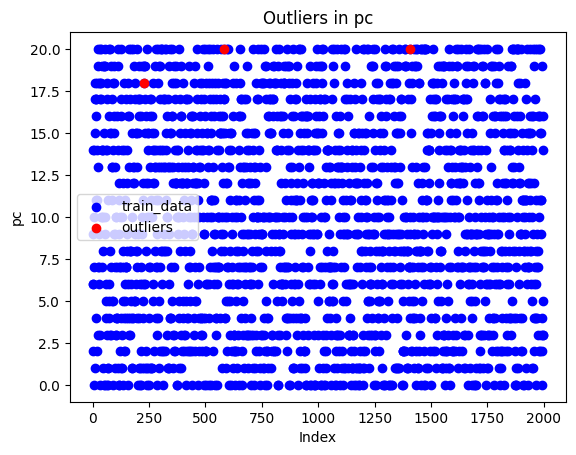

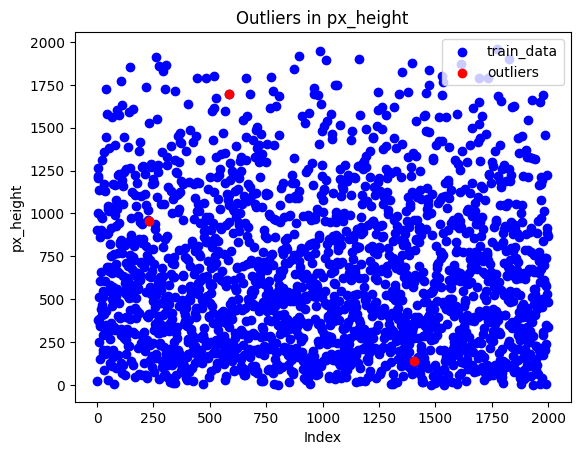

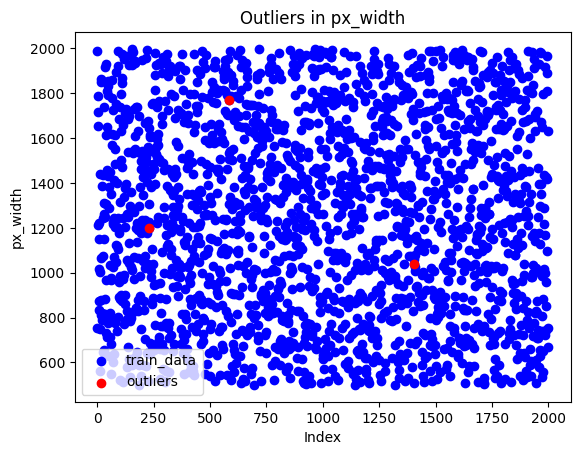

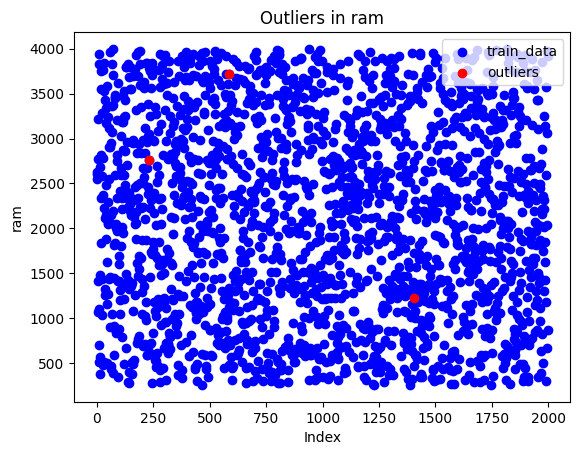

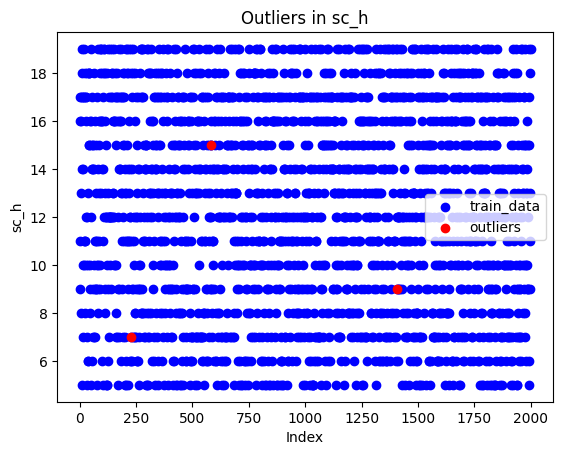

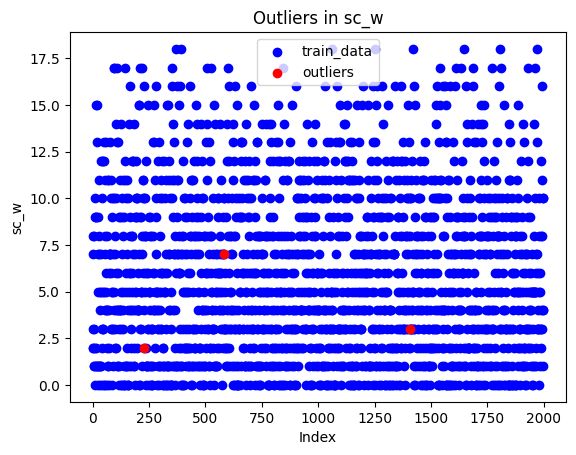

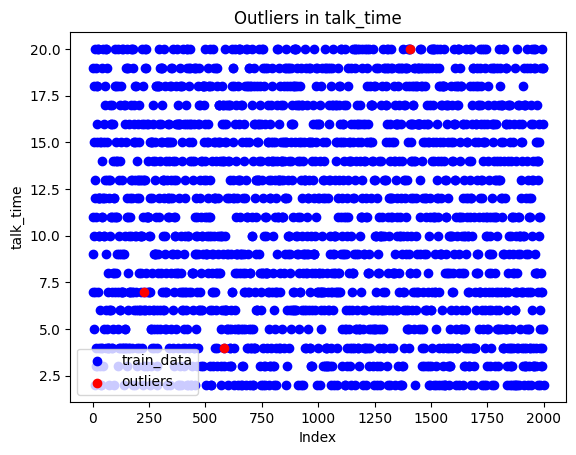

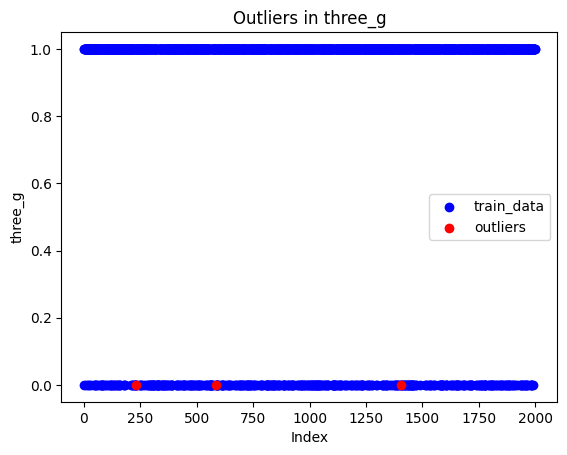

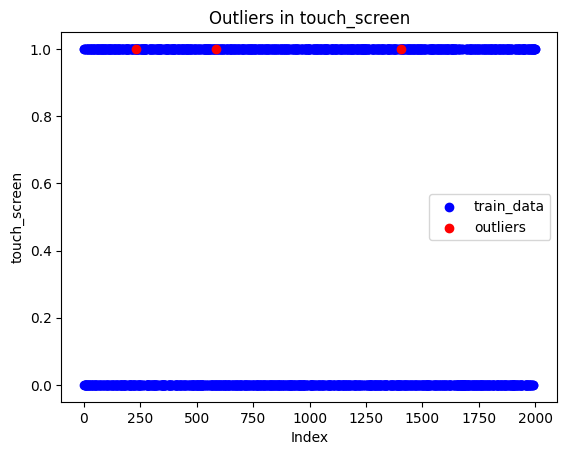

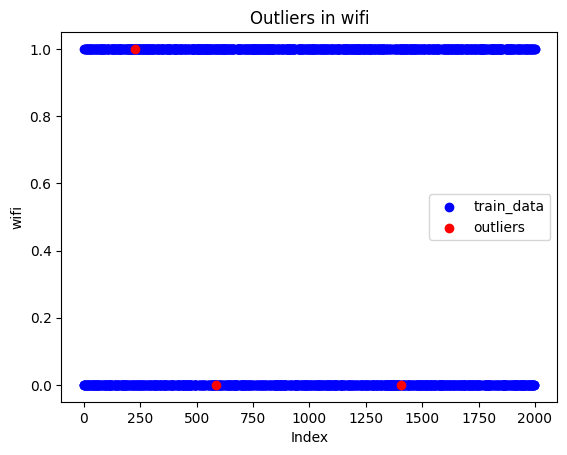

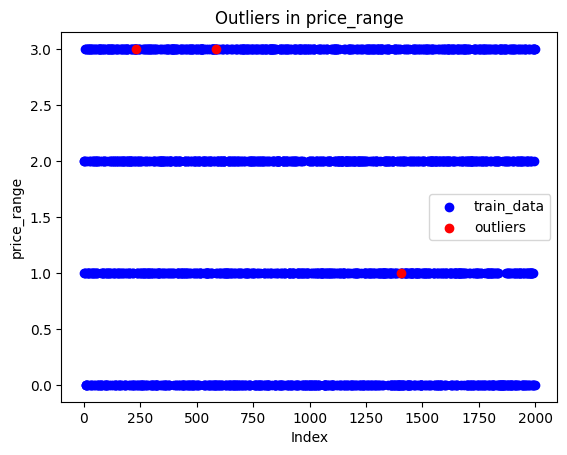

In [ ]:
# Scatter plot with marked outliers
for feature in features:
  plt.figure()
  plt.scatter(train_data.index, train_data[feature], color = 'blue',
              label='train_data')
  plt.scatter(outliers_detected, train_data.loc[outliers_detected, feature],
              color='red', label='outliers')
  plt.xlabel('Index')
  plt.ylabel(feature)
  plt.title('Outliers in {}'.format(feature))
  plt.legend()
  plt.show()

In [ ]:
train_data = train_data.drop(detect_outliers(train_data, train_data.columns),
                             axis=0).reset_index(drop=True)

# **3. Data transformation and feature engineering**

### To do:
Applying BoxCox transformation technique; to handle the skewed features and make it normally distributed.

***Skewness values can lead to biased models***

## 3.1 BoxCox transformation on skewed features: (`fc`, `px_height`, `sc_w`, `sc_h` )

In [ ]:
from scipy.stats import boxcox

In [ ]:
skewed_features = ['fc', 'px_height', 'sc_w', 'sc_h']

In [ ]:
# Apply BoxCox transformation to the skewed features
for feature in skewed_features:
  transformed_feature, lambda_parameter = boxcox(train_data[feature] + 1)
  train_data[feature] = transformed_feature

In [ ]:
# print lambda parameters
print('Lambda parameters: ')
for feature in skewed_features:
  _, lambda_parameter = boxcox(train_data[feature] + 1)
  print(f'{feature}: {lambda_parameter:.4f}')

Lambda parameters: 
fc: 0.7384
px_height: 0.9912
sc_w: 0.9258
sc_h: 0.9978


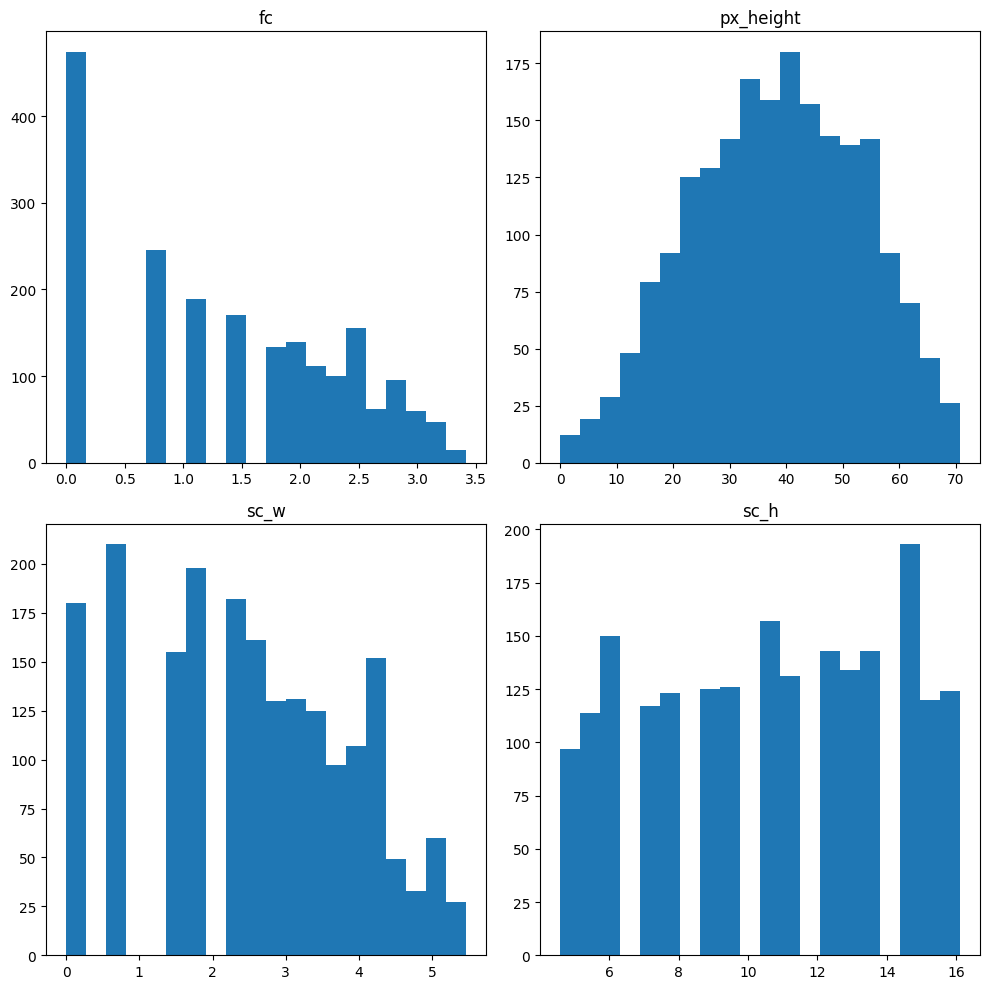

In [ ]:
# Visualize the transformed features
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, feature in enumerate(skewed_features):
  row = i // 2
  col = i % 2
  axes[row, col].hist(train_data[feature], bins = 20)
  axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

In [ ]:
skewness = train_data[skewed_features].skew()
skewness

fc          -0.032578
px_height   -0.113790
sc_w        -0.094250
sc_h        -0.131620
dtype: float64

skewness values between -0.5 and 0.5 is generally considered to be approximately symmetric.

## 3.2 Feature scaling:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_num = train_data[numerical_features]

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_scaled = scaler.fit_transform(x_num)

In [ ]:
print(x_scaled)

[[0.22778891 0.68       0.20913622 ... 0.29559041 0.58263378 0.94444444]
 [0.34736139 0.         0.         ... 0.8618863  0.33507382 0.27777778]
 [0.04141617 0.         0.33734611 ... 0.43967871 0.25017228 0.38888889]
 ...
 [0.94188377 0.16       0.20913622 ... 0.29559041 0.1453696  0.16666667]
 [0.6753507  0.16       0.50533212 ... 0.93108378 0.72043342 0.94444444]
 [0.00601202 0.6        0.56708868 ... 1.         0.40770064 0.        ]]


In [ ]:
# concatenate the scaled numerical data features with the rest of the dataset
x_scaled_train_data = pd.DataFrame(x_scaled, columns=numerical_features)
train_data = pd.concat([x_scaled_train_data, train_data.drop(numerical_features,
                                                     axis=1)], axis=1)

In [ ]:
train_data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0.227789,0.68,0.209136,0.080645,0.555556,0.900000,0.142857,0.10,0.094806,0.170895,...,0.295590,0.582634,0.944444,0,0,0,0,0,1,1
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.689414,0.993324,...,0.861886,0.335074,0.277778,1,1,1,1,1,0,2
2,0.041416,0.00,0.337346,0.629032,0.888889,0.541667,0.571429,0.30,0.809839,0.811749,...,0.439679,0.250172,0.388889,1,1,1,1,1,0,2
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.795178,0.858478,...,0.792391,0.631647,0.500000,1,0,0,1,0,0,2
4,0.881764,0.28,0.867072,0.677419,0.555556,0.508333,0.142857,0.70,0.792652,0.475300,...,0.222730,0.250172,0.722222,1,0,1,1,1,0,1


# **4. Feature selection and cross-validation:**

for this, I will perform cross-validation with feature selection using the `SelectKBest` technique

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
X = train_data.drop('price_range', axis=1)

In [ ]:
y = train_data['price_range']

In [ ]:
# create a SelectkBest object with chi-squared test and k = 5
selector = SelectKBest(score_func=chi2, k=5)

In [ ]:
# check the shapes of X and y
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1997, 20)
y shape: (1997,)


In [ ]:
missing_indices = y.index[y.isnull()]
x = X.drop(missing_indices)
y = y.drop(missing_indices)

In [ ]:
# transform the features using the selector
x_selected = selector.fit_transform(x, y)

In [ ]:
# get the indicies of the selected features
selected_indicies = selector.get_support(indices=True)

In [ ]:
# get the names of the selected features
selected_features = x.columns[selected_indicies]

In [ ]:
# create classifiers
mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
mc_svm = SVC(kernel='linear', decision_function_shape='ovr')
svm = SVC(kernel='rbf')
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [ ]:
classifiers = {'Multinomial Logistic regression': mlr,
               'Multi class SVM': mc_svm,
               'SVM': svm,
               'Random forest': rf,
               'Gradient boosting': gb,
               }

### Accuracy scores:

In [ ]:
for clf_name, clf in classifiers.items():
  scores = cross_val_score(clf, x_selected, y, cv=5)
  clf.fit(x_selected, y)
  y_pred = clf.predict(x_selected)
  accuracy = accuracy_score(y, y_pred)
  print(clf_name)
  print('Selected features: ', selected_features.tolist())
  print('Cross-validation accuracy: {:.2f} (+/- {:.2f})'.format(scores.mean(),
                                                                scores.std()))
  print('Full dataset accuracy: {:.2f}'.format(accuracy))

Multinomial Logistic regression
Selected features:  ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']
Cross-validation accuracy: 0.94 (+/- 0.01)
Full dataset accuracy: 0.95
Multi class SVM
Selected features:  ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']
Cross-validation accuracy: 0.95 (+/- 0.01)
Full dataset accuracy: 0.95
SVM
Selected features:  ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']
Cross-validation accuracy: 0.93 (+/- 0.01)
Full dataset accuracy: 0.95
Random forest
Selected features:  ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']
Cross-validation accuracy: 0.91 (+/- 0.01)
Full dataset accuracy: 1.00
Gradient boosting
Selected features:  ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']
Cross-validation accuracy: 0.91 (+/- 0.01)
Full dataset accuracy: 1.00


***Based on the accuracy scores:***

The `multinomial logistic regression` and `multi class svm`perform the best, with cross-validation accuracy scores of 94% and 95% respectively.

There are models that have a 100% accuracy on the full dataset and a low accuracy on the cross validation set, this may be a sign to overfitting if one of these models used. So, we need other metrics to select the best model while avoiding the overfitting.

### Confusion matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

Multinomial Logistic regression
Selected features:  ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']
Confusion matrix: 
[[497   3   0   0]
 [ 29 454  16   0]
 [  0  31 439  30]
 [  0   0  15 483]]


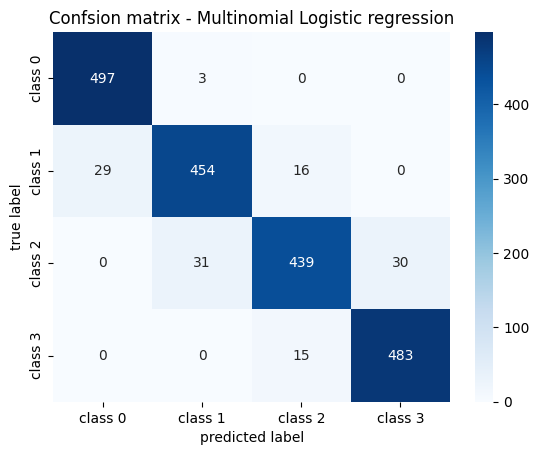

Multi class SVM
Selected features:  ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']
Confusion matrix: 
[[486  14   0   0]
 [ 10 472  17   0]
 [  0  22 455  23]
 [  0   0  20 478]]


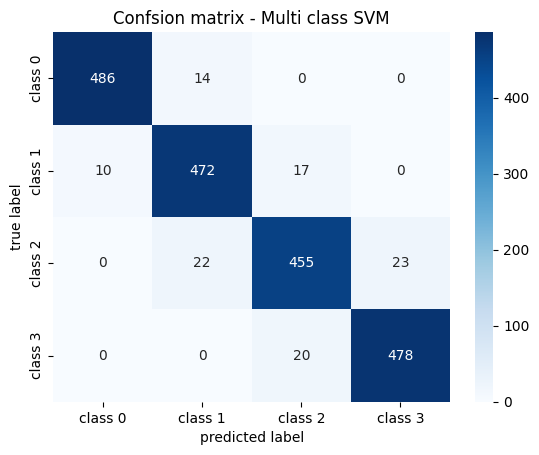

SVM
Selected features:  ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']
Confusion matrix: 
[[483  17   0   0]
 [ 21 460  18   0]
 [  0  27 443  30]
 [  0   0  30 468]]


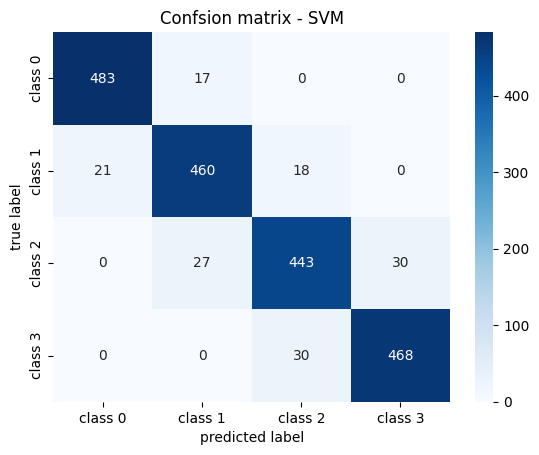

Random forest
Selected features:  ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']
Confusion matrix: 
[[481  19   0   0]
 [ 23 457  19   0]
 [  0  30 434  36]
 [  0   0  44 454]]


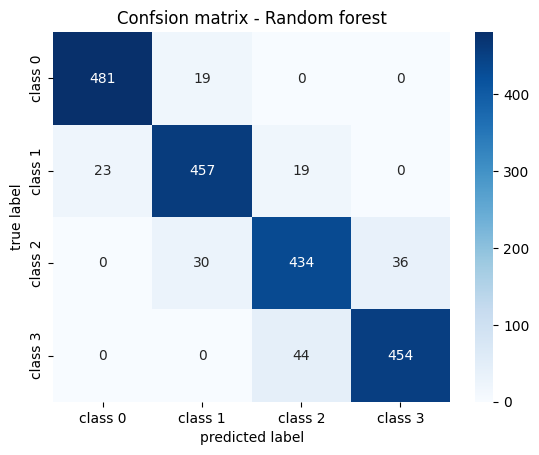

Gradient boosting
Selected features:  ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']
Confusion matrix: 
[[480  20   0   0]
 [ 23 456  20   0]
 [  0  36 435  29]
 [  0   0  45 453]]


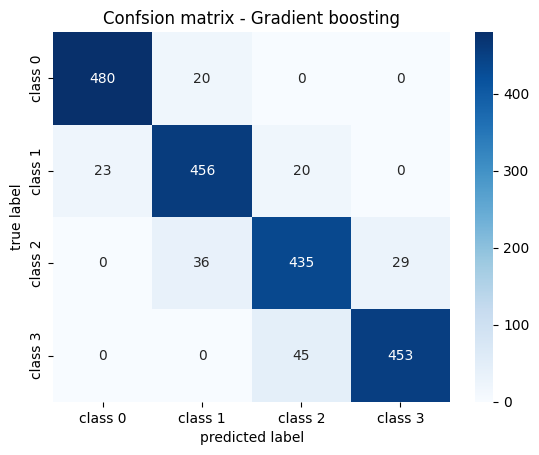

In [ ]:
for clf_name, clf in classifiers.items():
  y_pred = cross_val_predict(clf, x_selected, y, cv=5)
  cm = confusion_matrix(y, y_pred)
  print(clf_name)
  print("Selected features: ", selected_features.tolist())
  print("Confusion matrix: ")
  print(cm)

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
              xticklabels=['class 0', 'class 1', 'class 2', 'class 3'],
              yticklabels=['class 0', 'class 1', 'class 2', 'class 3'])
  plt.xlabel('predicted label')
  plt.ylabel('true label')
  plt.title("Confsion matrix - " + clf_name)
  plt.show()

***Based on the confusion matrix matric:***

- `Multi logical regression` has the highest number of correct classifications overall with a total of 497 instacnes correctly classified for class 0, and the fewest misclassifications for class 3 with 15 instances misclassified.
- `Multi class SVM` has the second highest number of correct classifications overall with a total of 472 instances correctly classified for class 1 and the fewest misclassifications for class 0 with 14 instances misclassified.

Overall, it looks like the `multinomial logistic regression` classifier performs the best followed closely by the `multi class SVM`.

### Precision, recall, and F1 score:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision_scores = []
recall_scores = []
f1_scores = []

In [ ]:
for clf_name, clf in classifiers.items():
    # calculate precision scores
    precisions = cross_val_score(clf, x_selected, y, cv=5, scoring='precision_macro')
    precision_scores.append(precisions)

    # calculate recall scores
    recalls = cross_val_score(clf, x_selected, y, cv=5, scoring='recall_macro')
    recall_scores.append(recalls)

    # calculate F1-scores
    f1s = cross_val_score(clf, x_selected, y, cv=5, scoring='f1_macro')
    f1_scores.append(f1s)

    print(clf_name)
    print('Selected features:', selector.get_support(indices=True).tolist())
    print('Precision: {:.2f}'.format(np.mean(precisions)))
    print('Recall: {:.2f}'.format(np.mean(recalls)))
    print('F1-Score: {:.2f}'.format(np.mean(f1s)))
    print()

Multinomial Logistic regression
Selected features: [0, 8, 9, 10, 18]
Precision: 0.94
Recall: 0.94
F1-Score: 0.94

Multi class SVM
Selected features: [0, 8, 9, 10, 18]
Precision: 0.95
Recall: 0.95
F1-Score: 0.95

SVM
Selected features: [0, 8, 9, 10, 18]
Precision: 0.93
Recall: 0.93
F1-Score: 0.93

Random forest
Selected features: [0, 8, 9, 10, 18]
Precision: 0.91
Recall: 0.91
F1-Score: 0.91

Gradient boosting
Selected features: [0, 8, 9, 10, 18]
Precision: 0.92
Recall: 0.91
F1-Score: 0.91



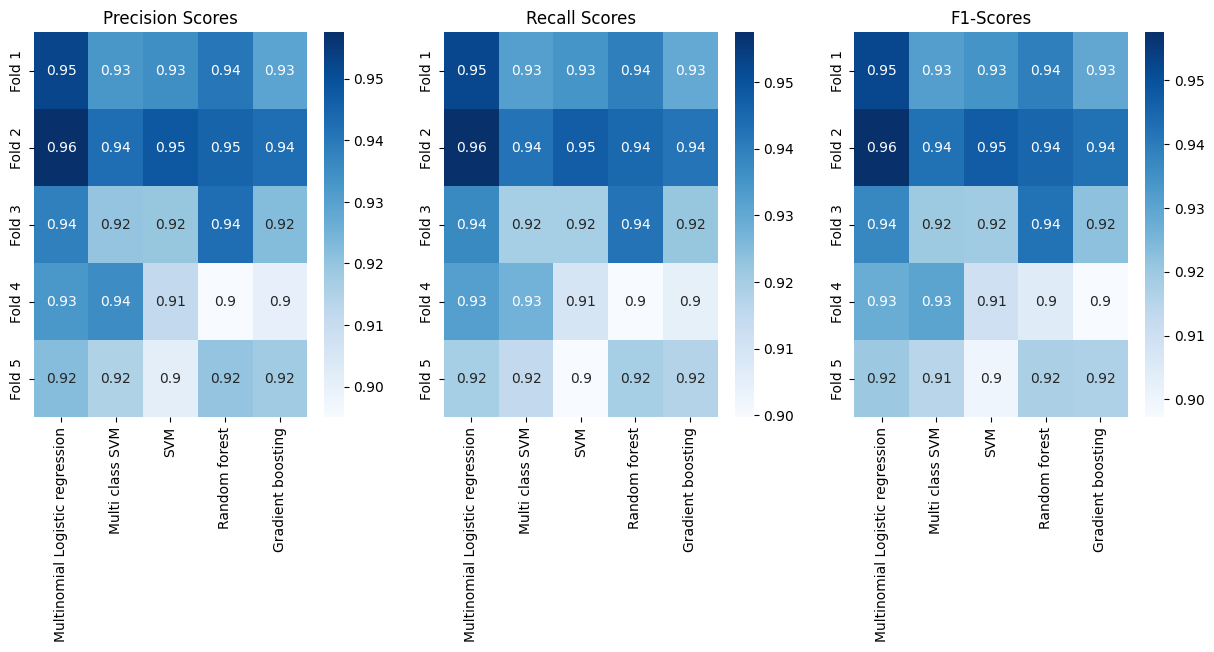

In [ ]:
# create a heatmap of the evaluation metrics
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(precision_scores, ax=axs[0], cmap='Blues', annot=True, xticklabels=list(classifiers.keys()), yticklabels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
sns.heatmap(recall_scores, ax=axs[1], cmap='Blues', annot=True, xticklabels=list(classifiers.keys()), yticklabels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
sns.heatmap(f1_scores, ax=axs[2], cmap='Blues', annot=True, xticklabels=list(classifiers.keys()), yticklabels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
axs[0].set_title('Precision Scores')
axs[1].set_title('Recall Scores')
axs[2].set_title('F1-Scores')
plt.show()

***Based on Precision, recall, and F1 score:***

It looks like that the `multinomial logistic regression` and `multi class SVM` classifiers again has the best values of precision, recall, and F1 score.

### Based on the variuos implemented metrics:
The `multinomial logistic regression` and `multi class SVM` models have the highest accuracy, precision, recall, and F1-score, indicating that they are both good choices for the task.

So, we will implement the two models and choose the best one based on the test data.

# **5. Model deployment and hyperparameters tuning:**

## 5.1 multinomial logistic regression model:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# split the data into features x and target y
X_train = train_data.drop('price_range', axis = 1)
# X_train = train_data[['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']]
y_train = train_data['price_range']

In [ ]:
# Split the data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                  random_state=42)

In [ ]:
hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                   'solver': ['lbfgs', 'newton-cg', 'sag'],
                   'max_iter': [100, 500, 1000, 2500, 5000],
                   'penalty': ['none', 'l2'],
                   'class_weight': ['balanced', None]
                   }

In [ ]:
# Define the logistic regression model
logreg = LogisticRegression(multi_class='multinomial')

In [ ]:
# Create a logistic regression model with cross-validation for hyperparameter tuning
logreg_cv = GridSearchCV(logreg, hyperparameters, cv=5, scoring='accuracy')

In [ ]:
# Fit the logistic regression model on the training set
logreg_cv.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ra

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 500, 1000, 2500, 5000],
                         'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'sag']},
             scoring='accuracy')

In [ ]:
# Print the best hyperparameters and the corresponding cross-validation accuracy score
print('Best hyperparameters:', logreg_cv.best_params_)
print('Cross-validation accuracy score:', logreg_cv.best_score_)

Best hyperparameters: {'C': 0.001, 'class_weight': None, 'max_iter': 1000, 'penalty': 'none', 'solver': 'sag'}
Cross-validation accuracy score: 0.9642966300940439


In [ ]:
# Evaluate the logistic regression model on the validation set
y_pred = logreg_cv.predict(X_val)
score = accuracy_score(y_val, y_pred)
print('Validation accuracy score:', score)

Validation accuracy score: 0.955


In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

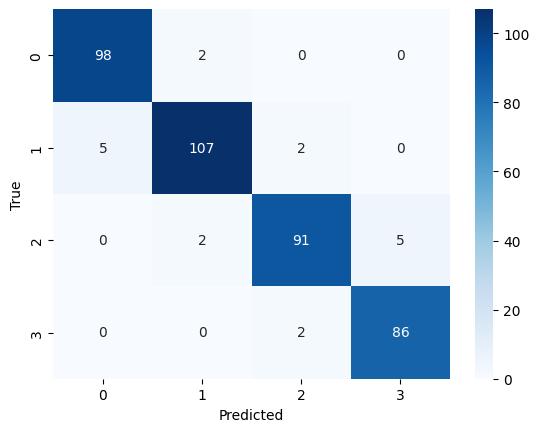

In [ ]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Calculate the class percentages in the validation set
class_counts = y_val.value_counts(normalize=True)
print('Class percentages in the validation set:')
print(class_counts)

Class percentages in the validation set:
1    0.285
0    0.250
2    0.245
3    0.220
Name: price_range, dtype: float64


In [ ]:
# Print the classification report
from sklearn.metrics import classification_report
print('Classification report:')
print(classification_report(y_val, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.96      0.94      0.95       114
           2       0.96      0.93      0.94        98
           3       0.95      0.98      0.96        88

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.96       400
weighted avg       0.96      0.95      0.95       400



In [ ]:
train_class_counts = y_train.value_counts()
val_class_counts = y_val.value_counts()

print('Class counts in the training set:')
print(train_class_counts)

print('Class counts in the validation set:')
print(val_class_counts)

Class counts in the training set:
3    410
2    402
0    400
1    385
Name: price_range, dtype: int64
Class counts in the validation set:
1    114
0    100
2     98
3     88
Name: price_range, dtype: int64


#### Balancing the train and validation sets to improve the accuracy using SMOTE technique:

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Balance the training set using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Calculate the class counts in the training set
train_class_counts = y_train.value_counts()
print('Class counts in the balanced training set:')
print(train_class_counts)

Class counts in the balanced training set:
2    410
0    410
1    410
3    410
Name: price_range, dtype: int64


In [ ]:
# Balance the validation set using SMOTE
X_val, y_val = smote.fit_resample(X_val, y_val)

In [ ]:
# Calculate the class counts in the validation set
val_class_counts = y_val.value_counts()
print('Class counts in the balanced validation set:')
print(val_class_counts)

Class counts in the balanced validation set:
1    114
2    114
0    114
3    114
Name: price_range, dtype: int64


In [ ]:
# Re-Define the hyperparameters to tune
hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                   'solver': ['lbfgs', 'newton-cg', 'sag'],
                   'max_iter': [100, 500, 1000, 2500, 5000],
                   'penalty': ['none', 'l2'],
                   'class_weight': ['balanced', None]
                   }

In [ ]:
logreg = LogisticRegression(multi_class='multinomial')

In [ ]:
# Re-Create a logistic regression model with cross-validation for hyperparameter tuning
logreg_cv = GridSearchCV(logreg, hyperparameters, cv=5, scoring='accuracy')

In [ ]:
# Re-Fit the logistic regression model on the balanced training set
logreg_cv.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-pac

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 500, 1000, 2500, 5000],
                         'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'sag']},
             scoring='accuracy')

In [ ]:
# Print the best hyperparameters and the corresponding cross-validation accuracy score
print('Best hyperparameters:', logreg_cv.best_params_)
print('Cross-validation accuracy score:', logreg_cv.best_score_)

Best hyperparameters: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'none', 'solver': 'sag'}
Cross-validation accuracy score: 0.9652439024390244


In [ ]:
# Evaluate the logistic regression model on the balanced validation set
y_pred = logreg_cv.predict(X_val)
score = accuracy_score(y_val, y_pred)
print('Validation accuracy score:', score)

Validation accuracy score: 0.9605263157894737


In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

In [ ]:
# Print the confusion matrix
print('Confusion matrix:')
print(cm)


Confusion matrix:
[[112   2   0   0]
 [  6 106   2   0]
 [  0   1 108   5]
 [  0   0   2 112]]


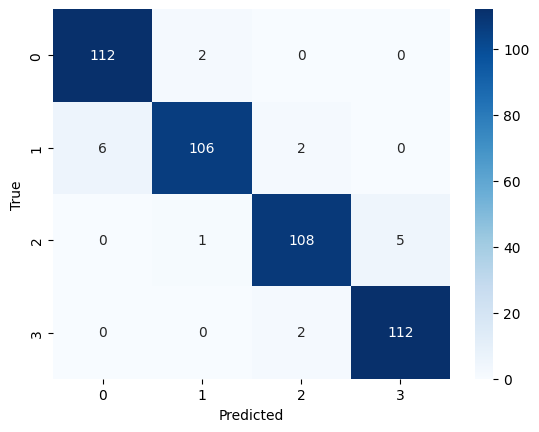

In [ ]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Print the classification report
print('Classification report:')
print(classification_report(y_val, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       114
           1       0.97      0.93      0.95       114
           2       0.96      0.95      0.96       114
           3       0.96      0.98      0.97       114

    accuracy                           0.96       456
   macro avg       0.96      0.96      0.96       456
weighted avg       0.96      0.96      0.96       456



## 5.2 Multi class SVM:

In [ ]:
# Define the parameter grid to search over
hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [ ]:
# Create a SVM model with cross-validation for hyperparameter tuning
svm_cv = GridSearchCV(SVC(random_state=42), hyperparameters, cv=5, n_jobs=-1, verbose=1)

In [ ]:
# Fit the SVM model on the training set
svm_cv.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [ ]:
# Print the best hyperparameters and the corresponding cross-validation accuracy score
print('Best hyperparameters:', svm_cv.best_params_)
print('Cross-validation accuracy score:', svm_cv.best_score_)

Best hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Cross-validation accuracy score: 0.9628048780487806


In [ ]:
# Evaluate the SVM model on the validation set
y_pred = svm_cv.predict(X_val)
score = accuracy_score(y_val, y_pred)
print('Validation accuracy score:', score)

Validation accuracy score: 0.9495614035087719


In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

In [ ]:
# Print the confusion matrix
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[113   1   0   0]
 [  6 105   3   0]
 [  0   4 104   6]
 [  0   0   3 111]]


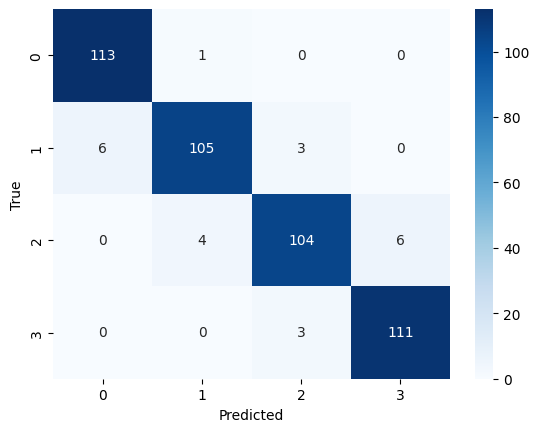

In [ ]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Print the classification report
print("Classification report:")
print(classification_report(y_val, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       114
           1       0.95      0.92      0.94       114
           2       0.95      0.91      0.93       114
           3       0.95      0.97      0.96       114

    accuracy                           0.95       456
   macro avg       0.95      0.95      0.95       456
weighted avg       0.95      0.95      0.95       456



By comparing the performance of the two models using different classification metrics, it appears that multinomial logistic regression produces slightly better results than the multi-class SVM. Therefore, I will save it as a .pkl file.

# **6. Saving the model in `.pkl` format**

In [ ]:
import pickle

# Save the trained SVM model to a file on Google Drive
with open('/content/drive/MyDrive/Mobile_price_prediction/models/mlr_model.pkl', 'wb') as f:
    pickle.dump(logreg_cv, f)

# **7. Price range prediction of `test_data`using `multinomial logistic regression` model**

In [ ]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
test_data = test_data.drop('id', axis=1)

In [ ]:
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


## **Test data preprocessing**

## 1. outliers removal:

In [ ]:
test_features = test_data.columns
test_outliers_detected = detect_outliers(test_data, test_features)
test_data.loc[test_outliers_detected]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
172,1250,0.5,18,63,0.7,165,1,19,1336,1532,1895,13,6,7,0,0,0,0,1,0
508,1667,2.5,17,5,0.8,119,3,20,211,1797,1496,13,9,12,1,0,0,0,0,0
749,1348,0.5,18,40,0.1,148,1,20,539,665,3543,12,1,11,1,1,0,0,0,0
459,1202,2.5,3,22,0.4,112,2,8,1900,1959,291,5,2,4,0,1,0,0,0,0
164,1762,1.0,5,50,0.9,104,3,12,1337,1684,2940,19,18,15,0,0,0,0,0,1


In [ ]:
test_data = test_data.drop(detect_outliers(test_data, test_data.columns),
                             axis=0).reset_index(drop=True)

### 2. check the distriution:

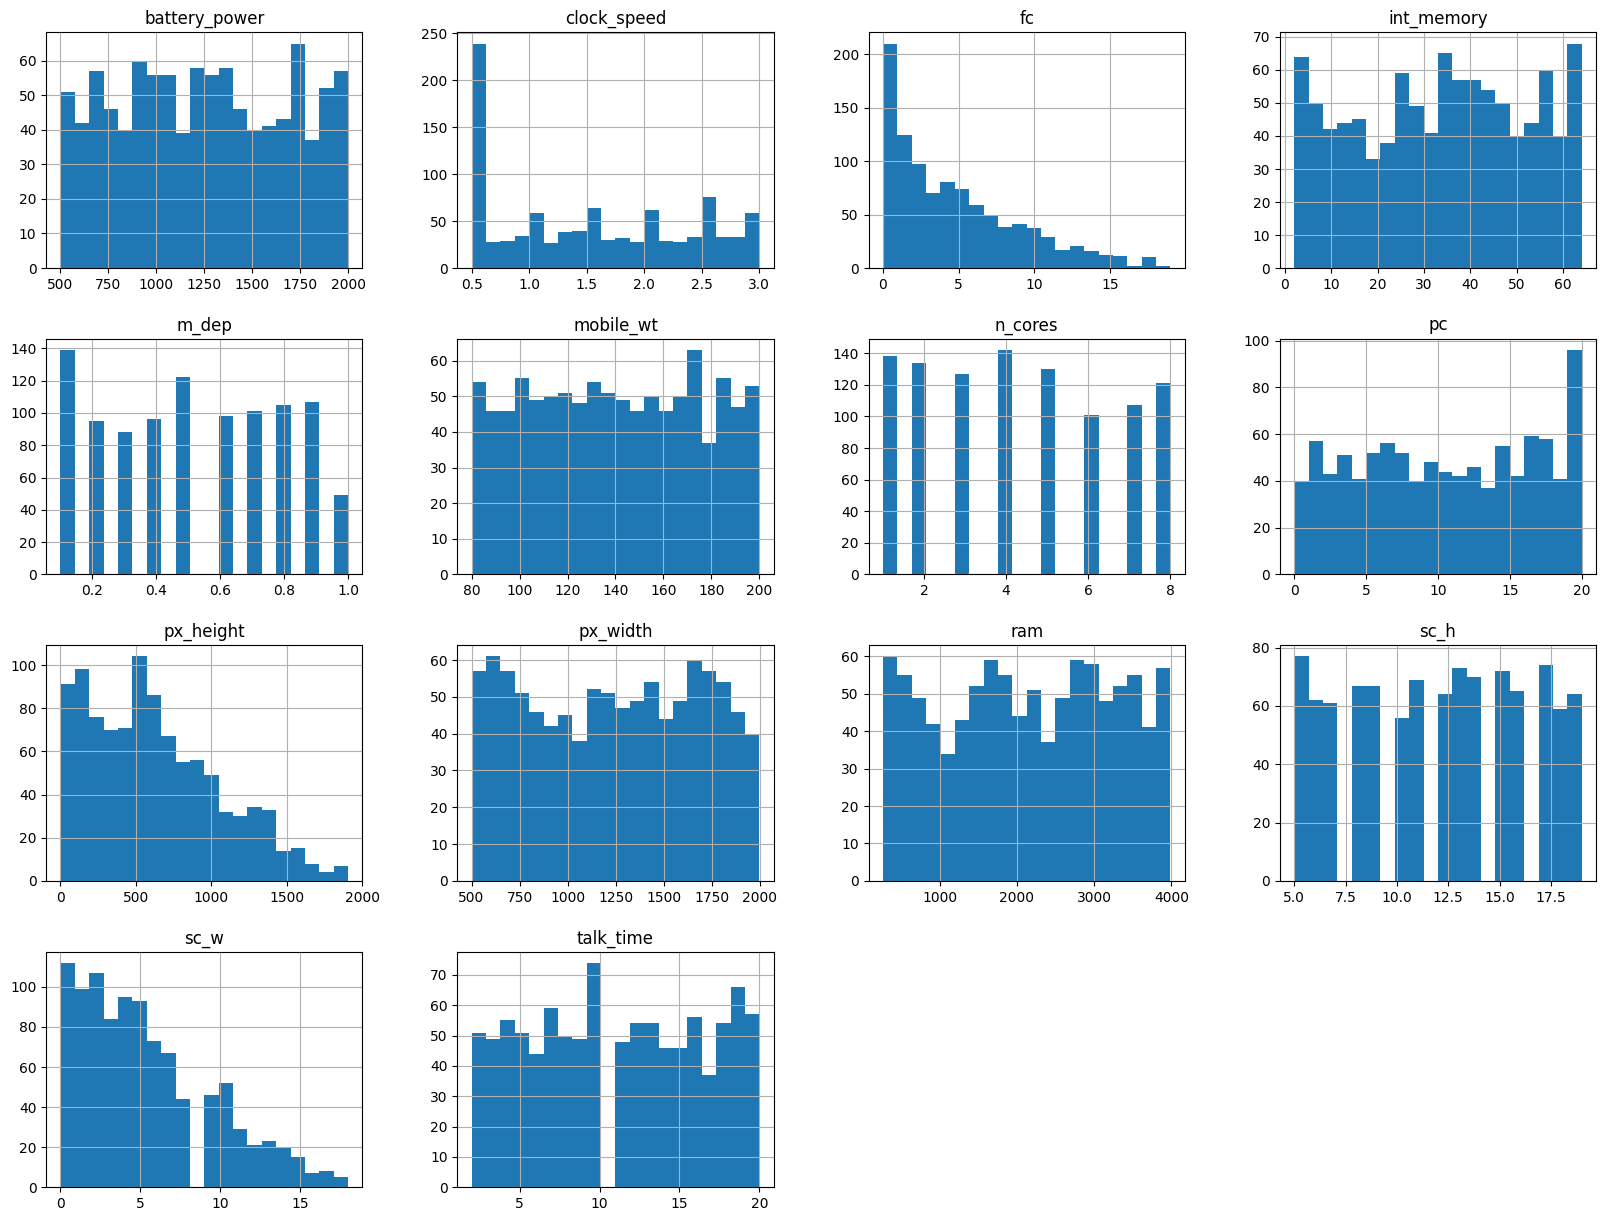

In [ ]:
test_numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                      'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
                      'sc_h', 'sc_w', 'talk_time']
test_data[test_numerical_features].hist(bins=20, figsize=(20, 15))
plt.show()

In [ ]:
# check the skewness in numbers
skewness = train_data[numerical_features].skew()
skewness

battery_power    0.033068
clock_speed      0.180643
fc              -0.032578
int_memory       0.057333
m_dep            0.087549
mobile_wt        0.007902
n_cores          0.001588
pc               0.018584
px_height       -0.113790
px_width         0.014874
ram              0.007077
sc_h            -0.131620
sc_w            -0.094250
talk_time        0.008003
dtype: float64

Features `px_height`, `sc_h`, `sc_w` need to be normally distributed using BoxCox transformation.

In [ ]:
test_skewed_features = ['px_height', 'sc_w', 'sc_h']

In [ ]:
# Apply BoxCox transformation to the skewed features
for feature in test_skewed_features:
  transformed_feature, lambda_parameter = boxcox(test_data[feature] + 1)
  test_data[feature] = transformed_feature

In [ ]:
# print lambda parameters
print('Lambda parameters: ')
for feature in test_skewed_features:
  _, lambda_parameter = boxcox(test_data[feature] + 1)
  print(f'{feature}: {lambda_parameter:.4f}')

Lambda parameters: 
px_height: 0.9897
sc_w: 0.9147
sc_h: 0.9924


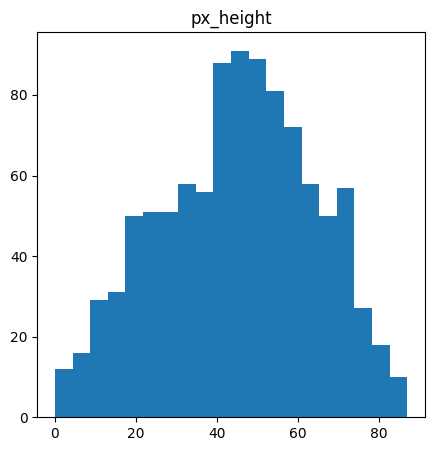

In [ ]:
# Visualize the transformed features
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(test_data[test_skewed_features[0]], bins=20)
ax.set_title(test_skewed_features[0])
plt.show()

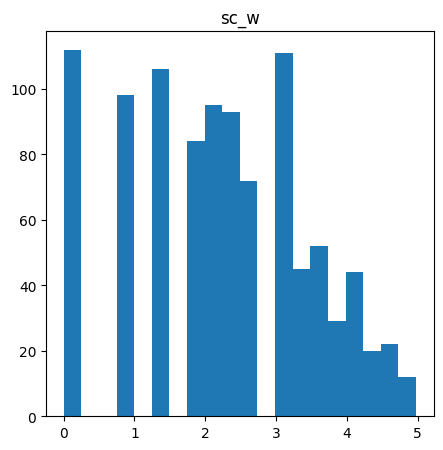

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(test_data[test_skewed_features[1]], bins=20)
ax.set_title(test_skewed_features[1])
plt.show()

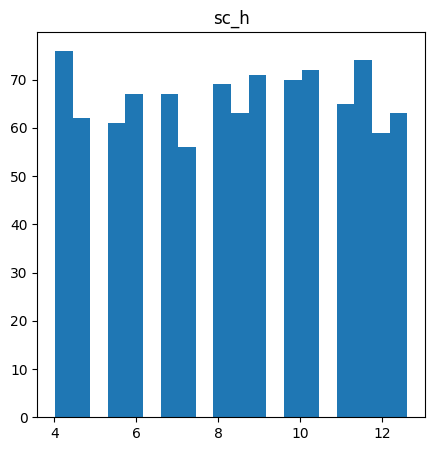

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(test_data[test_skewed_features[2]], bins=20)
ax.set_title(test_skewed_features[2])
plt.show()

## 3. Feature scaling:

In [ ]:
x_num = test_data[test_numerical_features]

In [ ]:
x_scaled = scaler.fit_transform(x_num)

In [ ]:
print(x_scaled)

[[0.36224149 0.52       0.73684211 ... 0.52783807 0.60043964 0.        ]
 [0.22748499 0.         0.21052632 ... 0.08077125 0.         0.27777778]
 [0.87191461 0.92       0.05263158 ... 0.86897791 0.73445728 0.44444444]
 ...
 [0.45697131 0.36       0.05263158 ... 0.         0.         0.66666667]
 [0.68912608 0.         0.         ... 0.73507784 0.77359282 0.22222222]
 [0.51367578 0.         0.21052632 ... 0.31095676 0.26603758 0.05555556]]


In [ ]:
# concatenate the scaled numerical data features with the rest of the dataset
x_scaled_test_data = pd.DataFrame(x_scaled, columns=test_numerical_features)
test_data = pd.concat([x_scaled_test_data, test_data.drop(
    test_numerical_features, axis=1)], axis=1)

In [ ]:
test_data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0.362241,0.52,0.736842,0.048387,0.000000,0.941667,0.285714,0.8,0.327388,0.608550,0.862319,0.527838,0.600440,0.000000,1,1,0,0,1,0
1,0.227485,0.00,0.210526,0.951613,0.777778,0.925000,0.571429,0.6,0.615093,0.237809,0.974772,0.080771,0.000000,0.277778,1,1,1,1,0,0
2,0.871915,0.92,0.052632,0.403226,0.888889,0.883333,0.285714,0.2,0.810808,0.577822,0.572464,0.868978,0.734457,0.444444,1,0,0,0,1,1
3,0.697799,0.00,0.947368,0.370968,0.444444,0.133333,1.000000,1.0,0.377454,0.835671,0.974235,0.384503,0.000000,0.277778,0,1,1,1,1,0
4,0.623082,0.36,0.578947,0.758065,0.444444,0.233333,0.714286,0.9,0.616381,0.206413,0.405260,0.735078,0.648373,0.277778,0,0,1,1,0,1


## **Prediction step:**

In [ ]:
from joblib import load
model = load('/content/drive/MyDrive/Mobile_price_prediction/models/mlr_model.pkl')

In [ ]:
test_data = test_data[X_train.columns]

In [ ]:
predicted_price_range = model.predict(test_data)

In [ ]:
predicted_price_range

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 1, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 0, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2, 3, 3,
       1, 1, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 3, 2, 3,
       3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 2, 0, 3, 1, 2, 0, 0, 2,
       1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2, 3, 3,
       3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 1, 0, 3, 2, 3, 3, 2,
       1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 0, 0,

In [ ]:
test_data['price_range'] = predicted_price_range

In [ ]:
test_data

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0.362241,0.52,0.736842,0.048387,0.000000,0.941667,0.285714,0.80,0.327388,0.608550,...,0.527838,0.600440,0.000000,1,1,0,0,1,0,3
1,0.227485,0.00,0.210526,0.951613,0.777778,0.925000,0.571429,0.60,0.615093,0.237809,...,0.080771,0.000000,0.277778,1,1,1,1,0,0,3
2,0.871915,0.92,0.052632,0.403226,0.888889,0.883333,0.285714,0.20,0.810808,0.577822,...,0.868978,0.734457,0.444444,1,0,0,0,1,1,2
3,0.697799,0.00,0.947368,0.370968,0.444444,0.133333,1.000000,1.00,0.377454,0.835671,...,0.384503,0.000000,0.277778,0,1,1,1,1,0,3
4,0.623082,0.36,0.578947,0.758065,0.444444,0.233333,0.714286,0.90,0.616381,0.206413,...,0.735078,0.648373,0.277778,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.800534,0.56,0.000000,0.838710,0.444444,0.750000,0.857143,0.85,0.569642,0.275217,...,0.666917,0.648373,0.722222,1,0,1,1,1,0,2
991,0.072715,0.52,0.000000,0.177419,0.888889,0.883333,0.428571,0.10,0.770901,0.755511,...,0.235959,0.156469,0.944444,0,1,0,0,1,1,1
992,0.456971,0.36,0.052632,0.096774,0.444444,0.000000,0.000000,0.60,0.486680,0.216433,...,0.000000,0.000000,0.666667,0,0,1,1,0,0,0
993,0.689126,0.00,0.000000,0.774194,0.333333,0.758333,0.142857,0.60,0.121462,0.221109,...,0.735078,0.773593,0.222222,1,1,0,0,1,0,2


In [ ]:
class_counts = test_data['price_range'].value_counts()

In [ ]:
class_counts

3    260
0    257
2    252
1    226
Name: price_range, dtype: int64

In [ ]:
class_percentages = class_counts / len(test_data['price_range']) * 100

In [ ]:
class_percentages

3    26.130653
0    25.829146
2    25.326633
1    22.713568
Name: price_range, dtype: float64

In [ ]:
test_classes_table = pd.DataFrame({
    'class': class_counts.index,
    'count': class_counts.values,
    'percentage': class_percentages.values
})

In [ ]:
print("Test data classes table summary:\n\n", test_classes_table)

Test data classes table summary:

    class  count  percentage
0      3    260   26.130653
1      0    257   25.829146
2      2    252   25.326633
3      1    226   22.713568
